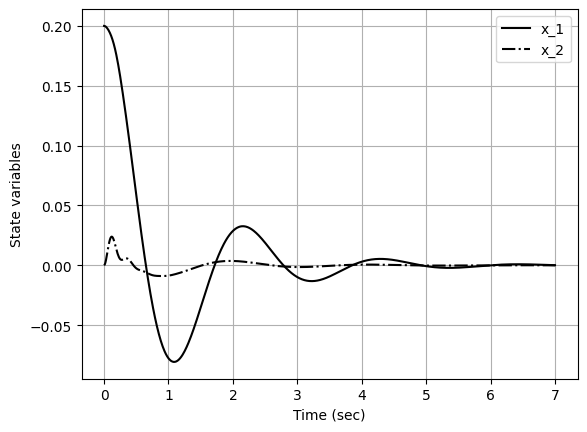

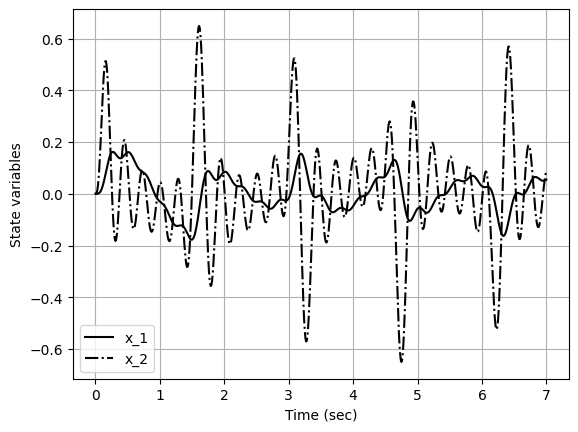

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import control as ctrl

# Define system matrices
A = np.array([[0, 0, 1, 0],
              [0, 0, 0, 1],
              [-10, 10, -2, 2],
              [60, -660, 12, -12]])

b1 = np.array([0, 0, 0.0033, -0.02]).reshape(-1, 1)
b2 = np.array([0, 0, 0, 600]).reshape(-1, 1)
B = np.hstack([b1, b2])

C = np.array([1, 0, 0, 0])
D = 0

# Create state-space model for active suspension using second input (b2)
active_suspension = ctrl.StateSpace(A, b2, C, D)

# Time vector
t = np.arange(0, 7.01, 0.01)

# Initial response
x0 = np.array([0.2, 0, 0, 0])
t1, y1, x1 = ctrl.initial_response(active_suspension, T=t, X0=x0, return_x=True)

plt.figure()
plt.plot(t1, x1[0], 'k', label='x_1')
plt.plot(t1, x1[1], 'k-.', label='x_2')
plt.grid(True)
plt.xlabel('Time (sec)')
plt.ylabel('State variables')
plt.legend()
plt.show()

# Generate input u
u = 0.1 * (np.sin(5 * t) + np.sin(9 * t) + np.sin(13 * t) + np.sin(17 * t) + np.sin(21 * t))

# Simulate the system with input u
t2, y2, x2 = ctrl.forced_response(active_suspension, T=t, U=u, return_x=True)

plt.figure()
plt.plot(t2, x2[0], 'k', label='x_1')
plt.plot(t2, x2[1], 'k-.', label='x_2')
plt.grid(True)
plt.xlabel('Time (sec)')
plt.ylabel('State variables')
plt.legend()
plt.show()
